In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output

#import SchemDraw as schem
#import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font) 

<h1>Laminar Pipe Flow</h1>

In this first tutorial, you will simulate a laminar pipe flow using the cad file <FONT FACE="courier" style="color:blue">CAD>PipeD0.025L2.5VOF.iges</FONT> which is the <b>Volume of Fluid</b> of the CAD below. The pipe inner diameter is 2.5cm and 250cm long.
<img src="CAD/Pipe.png">
The Junior course of Fluid Mechanics has taught you that:
<ul>
<li> The entrance length for laminar flow is given by
$$
\frac{L_e}{D}=0.05Re=0.05\frac{U_{b}D}{\nu}
$$
</li>
<li> The pressure gradient is constant in the fully developed region ($x > L_e$)</li>
<li> The velocity profile in the fully developed region is governed by the reduced streamwise momentum equation 
$$
0=-\frac{dP}{dx}+\frac{\mu}{r}\frac{d}{dr}r\frac{dU}{dr}
$$
</li>
<li>The solution of this equation is
$$
U(r) = \frac{R^2}{4\mu}\left(-\frac{dP}{dx}\right)\left(1-\frac{r^2}{R^2}\right)=2U_b\left(1-\frac{r^2}{R^2}\right)
$$
</li>
<li>Hence, 
$$
U_b=\frac{R^2}{8\mu}\left(-\frac{dP}{dx}\right)
$$
<li> Finally, the wall shear stress is proportional to the pressure drop:
$$
-\frac{dP}{dx}=\frac{2\tau_w}{R}
$$
</ul>


<p class='alert alert-danger'>
Using <a href="https://www.simscale.com">https://www.simscale.com</a>, Simulate a laminar flow. Verify and Validate (V & V) your simulation.
</p>

In [2]:
D = 2.5e-2 # m
nu = 15.e-6 #m^2/s
rho = 1.2 #kg/m^3
mu = nu/rho 

R = D/2

Re = 500.

Ub = Re * nu / D
print("Bulk velocity= %2.2f m/s" %Ub)
flowrate = Ub * np.pi * R**2
print("Flow rate = %1.4e m^3/s" %flowrate)

Bulk velocity= 0.30 m/s
Flow rate = 1.4726e-04 m^3/s


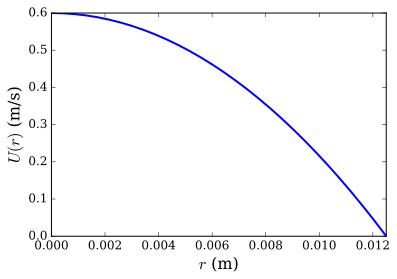

In [6]:
import numpy as np

n = 30
r = np.linspace(0,R,n)

U = 2 * Ub * (1 - np.power(r,2)/R**2)
import matplotlib.pyplot as plt

plt.plot(r,U,linewidth = 2)
plt.xlabel(r"$r$ (m)", fontdict = fontlabel)
plt.ylabel(r"$U(r)$ (m/s)", fontdict = fontlabel)
plt.xlim(0,R)
plt.show()

The wall shear stress is defined:
$$
\tau_w = \mu \frac{dU}{dr}
$$

In [7]:
tauw = - mu * (U[n-1] - U[n-2])/(r[n-1] - r[n-2])
print("wall shear stress = %1.4f Pa" %tauw)

wall shear stress = 0.0012 Pa


In [5]:
mdpdx = 8 * mu *Ub / R**2
tauw_e = R * mdpdx / 2
print("Exact wall shear stress = %1.4f Pa" %tauw_e)

Exact wall shear stress = 0.0012 Pa


In [8]:
import csv, sys
filename = 'Data/LaminarPipe/Coarse/centerline.csv'
with open(filename, newline='') as f:
    reader = csv.reader(f)
    try:
        for row in reader:
            print(row)
    except csv.Error as e:
        sys.exit('file {}, line {}: {}'.format(filename, reader.line_num, e))



['p', 'U:0', 'U:1', 'U:2', 'vtkValidPointMask', 'arc_length', 'Points:0', 'Points:1', 'Points:2']
['0.63002', '0.30064', '9.6232e-08', '-2.0232e-08', '1', '0', '0', '0', '0']
['0.62945', '0.30417', '1.5774e-07', '-4.3457e-08', '1', '0.0025', '0.0025', '0', '0']
['0.62798', '0.31059', '2.024e-07', '-8.7805e-08', '1', '0.005', '0.005', '0', '0']
['0.62565', '0.3185', '1.8831e-07', '-1.3866e-07', '1', '0.0075', '0.0075', '0', '0']
['0.62313', '0.3263', '1.6058e-07', '-1.5571e-07', '1', '0.01', '0.01', '0', '0']
['0.62074', '0.33345', '1.634e-07', '-1.4531e-07', '1', '0.0125', '0.0125', '0', '0']
['0.6185', '0.34005', '1.5369e-07', '-1.3164e-07', '1', '0.015', '0.015', '0', '0']
['0.61637', '0.34619', '1.354e-07', '-1.2342e-07', '1', '0.0175', '0.0175', '0', '0']
['0.61435', '0.35192', '1.1626e-07', '-1.1015e-07', '1', '0.02', '0.02', '0', '0']
['0.61243', '0.35728', '1.001e-07', '-9.3377e-08', '1', '0.0225', '0.0225', '0', '0']
['0.61062', '0.36231', '8.7813e-08', '-7.4749e-08', '1', '0.0

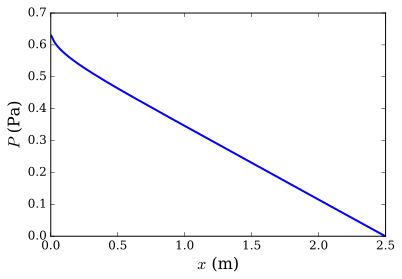

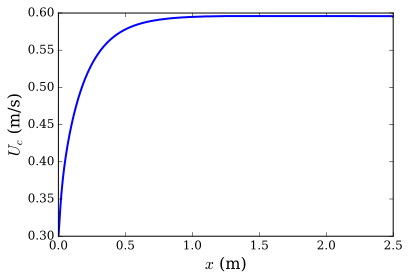

In [9]:
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
P = data[:,0]
U = data[:,1]
x = data[:,5]
plt.plot(x,P,linewidth = 2)
plt.xlabel(r"$x$ (m)", fontdict = fontlabel)
plt.ylabel(r"$P$ (Pa)", fontdict = fontlabel)
plt.show()
plt.plot(x,U,linewidth = 2)
plt.xlabel(r"$x$ (m)", fontdict = fontlabel)
plt.ylabel(r"$U_c$ (m/s)", fontdict = fontlabel)
plt.show()

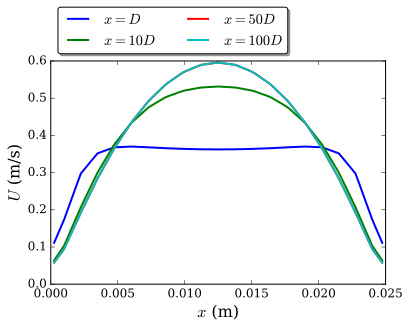

In [10]:
filename = 'Data/LaminarPipe/Coarse/cross-section-x=0.025.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
U_0_025 = data[:,1]
x_0_025 = data[:,5]
filename = 'Data/LaminarPipe/Coarse/cross-section-x=0.25.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
U_0_25 = data[:,1]
x_0_25 = data[:,5]
filename = 'Data/LaminarPipe/Coarse/cross-section-x=1.25.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
U_1_25 = data[:,1]
x_1_25 = data[:,5]
filename = 'Data/LaminarPipe/Coarse/cross-section-x=2.25.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
U_2_25 = data[:,1]
x_2_25 = data[:,5]
plt.plot(x_0_025,U_0_025,linewidth = 2,label = r"$x=D$")
plt.plot(x_0_25,U_0_25,linewidth = 2,label = r"$x=10D$")
plt.plot(x_1_25,U_1_25,linewidth = 2,label = r"$x=50D$")
plt.plot(x_2_25,U_2_25,linewidth = 2,label = r"$x=100D$")
plt.xlabel(r"$x$ (m)", fontdict = fontlabel)
plt.ylabel(r"$U$ (m/s)", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()